In [7]:
%pip install gensim
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1. Generating random txt documents (json, yaml, xml)

In [8]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import DBSCAN
import numpy as np
from generate_txt_doc import generate_random_docs

# "types_count" - count of different txt docs (further clustering should guess this number)
# "docs_per_type" - number of docs for each type (points per cluster)
# "mixin" - degree of mixin "keys" for each document
docs_keys_arr = generate_random_docs(types_count = 9, docs_pre_type = 10, mixin = 1)
input_words = [[sub_string.split('.')[-1] for sub_string in sublist] for sublist in docs_keys_arr]
documents = [" ".join(i) for i in input_words]


### 2. Build Doc2Vec model

In [9]:
tagged_data = [TaggedDocument(words=document.lower().split(), tags=[str(idx)]) for idx, document in enumerate(documents)]
print(tagged_data)

model = Doc2Vec(vector_size=3, window=4, min_count=2, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

doc_vectors = np.array([model.infer_vector(doc.words) for doc in tagged_data])

[TaggedDocument(words=['schools', 'menlo', 'discouraging', 'wells', 'jim', 'special', 'congressional', 'working', 'florida', 'fits', 'breathing', 'engineering', 'false', 'queen', 'structure', 'moment', 'turf', 'profession', 'knew', 'reruns', 'traditional', 'puts', 'mulford', 'plummeted', 'boom', 'treasurer', 'trained', 'homosexual', 'electoral', 'automotive', 'urban', 'bonuses', 'gary', 'tender', 'latest', 'turner', 'paper', 'flag', 'knowing', 'sinking', 'oils', 'delivering', 'performer', 'maturities', 'really', 'walter', 'word', 'pressures', 'finding', 'pacific', 'springs', 'tide', 'persistent', 'repayment'], tags=['0']), TaggedDocument(words=['schools', 'menlo', 'discouraging', 'wells', 'jim', 'special', 'congressional', 'working', 'florida', 'fits', 'breathing', 'engineering', 'false', 'queen', 'structure', 'moment', 'turf', 'profession', 'knew', 'reruns', 'traditional', 'puts', 'mulford', 'plummeted', 'boom', 'treasurer', 'trained', 'homosexual', 'electoral', 'automotive', 'urban',

### 3. Clastering with DBSCAN

clusters = 9


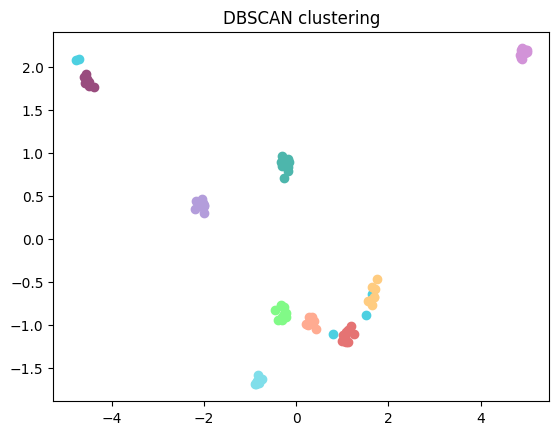

In [10]:
dbscan = DBSCAN(eps=0.15, min_samples=3)
cluster_labels = dbscan.fit_predict(doc_vectors)

clusters = {}
for idx, label in enumerate(cluster_labels):
    if label in clusters:
        clusters[label].append(documents[idx])
    else:
        clusters[label] = [documents[idx]]

# for cluster_label, cluster in clusters.items():
#     print(f"CLUSTER {cluster_label}: {cluster}")

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
doc_vectors_pca = pca.fit_transform(doc_vectors)

# colors = ['b', 'c', 'y', 'r', 'g', 'm', '#768', '#123', '#c1c', '#e10', '#700', '#893']
colors = [
    '#b39ddb',
    '#ffab91',
    '#80deea',
    '#81fa87',
    '#d293d8',
    '#ffcc80',
    '#4db6ac',
    '#994c7e',
    '#e57373',
    '#b0bec5',
    '#f48fb1',
    '#b2dfdb',
    '#fff59d',
    '#4dd0e1',
    '#90a4ae',
    '#f06292',
    '#4fc3f7',
    '#aed581',
    '#9575cd',
    '#4dd0e1',
    ]

cls_n = len([k for k in clusters.keys() if k>=0])
print(f'clusters = {cls_n}')

for idx, label in enumerate(cluster_labels):
    c_idx = label if label >= 0 else label + cls_n
    plt.scatter(doc_vectors_pca[idx, 0], doc_vectors_pca[idx, 1], c=colors[label], label=f'Cluster {label}')

plt.title('DBSCAN clustering')
plt.show()

### 4. Clastering with BIRCH

clusters = 9


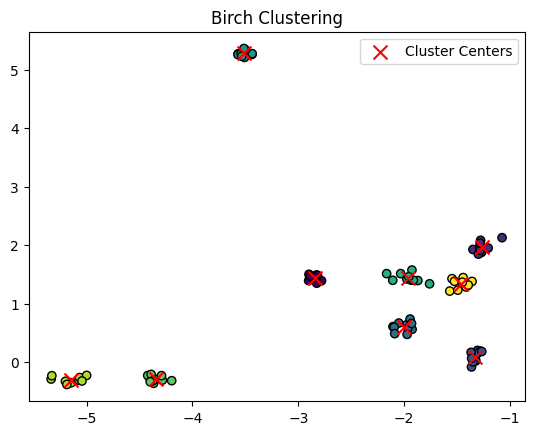

In [12]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

data = doc_vectors

birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(data)

labels = birch.predict(data)
centers = birch.subcluster_centers_

print(f'clusters = {len(centers)}')

plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centers[:,0], centers[:,1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('Birch Clustering')
plt.legend()
plt.show()
